# Multi-Year Student Performance Analysis (STEM Grades)

## Project Overview
This project analyzes student final average grades from my first three years teaching science classes at Altoona Area High School (AAHS). The primary focus is on Physical Science C (PSC), as it is the only course taught consistently across all three years. By examining trends in final grades, I aim to determine how external factors such as time of day and class size impact student performance.

## Dataset
* Source: Real final average grades from the 2023-2025 school years.
* Privacy: All student data has been anonymized and all personally identifiable information has been strictly removed.
* Structure: Data includes Student ID, School Year, Subject, Class Period, Number in Class, and Final Grade.

## Research Questions
1. Year-Over-Year Trends: Have final PSC grades changed significantly during my first three years of teaching?
2. Class Period Effects: Are there statistical differences in student grades based on the time of day the class meets?
3. Class Size Effects: Is there a correlation between the number of students in a class and their academic performance?

## Methods
* Stack: Python (Pandas for data cleaning, Seaborn/Matplotlib for visualization)
* Statistics: Shapiro-Wilkes, Kruskal-Wallis, Dunn's Test

In [1]:
# import libraries
import numpy as np
import pandas as pd
import janitor
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import scikit_posthocs as sp

In [2]:
# import dataset (created using LIMS)
all_grades_raw = pd.read_csv("data/y123_grades.csv")
all_grades_raw

,Student ID,School Year,Subject,Class Period,Number in Class,Final Grade
0,1,2023,AC,2,13,71
1,2,2023,AC,2,13,90
2,3,2023,AC,2,13,73
3,4,2023,AC,2,13,70
4,5,2023,AC,2,13,77
...,...,...,...,...,...,...
257,258,2025,FC,8,24,46
258,259,2025,FC,8,24,83
259,260,2025,FC,8,24,93
260,261,2025,FC,8,24,99


In [3]:
# clean names using janitor
all_grades = all_grades_raw.clean_names()
all_grades

,student_id,school_year,subject,class_period,number_in_class,final_grade
0,1,2023,AC,2,13,71
1,2,2023,AC,2,13,90
2,3,2023,AC,2,13,73
3,4,2023,AC,2,13,70
4,5,2023,AC,2,13,77
...,...,...,...,...,...,...
257,258,2025,FC,8,24,46
258,259,2025,FC,8,24,83
259,260,2025,FC,8,24,93
260,261,2025,FC,8,24,99


In [4]:
# describe
all_grades.describe()

,student_id,school_year,class_period,number_in_class,final_grade
count,262.000000,262.000000,262.000000,262.000000,262.000000
mean,131.500000,2024.083969,5.015267,16.511450,80.213740
std,75.777085,0.778427,2.543069,5.447579,15.686834
min,1.000000,2023.000000,1.000000,5.000000,34.000000
25%,66.250000,2023.000000,3.000000,13.000000,72.000000
50%,131.500000,2024.000000,4.000000,14.000000,84.000000
75%,196.750000,2025.000000,8.000000,20.000000,92.000000
max,262.000000,2025.000000,8.000000,26.000000,100.000000


In [5]:
# summarize
all_grades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 262 entries, 0 to 261
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   student_id       262 non-null    int64 
 1   school_year      262 non-null    int64 
 2   subject          262 non-null    object
 3   class_period     262 non-null    int64 
 4   number_in_class  262 non-null    int64 
 5   final_grade      262 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 12.4+ KB


In [6]:
# group grade data into classes (academic chemistry, physical science c)
ac_grades = all_grades[all_grades['subject'] == 'AC']
psc_grades = all_grades[all_grades['subject'] == 'PSC']

# Research Question #1
Year-Over-Year Trends: Have final PSC grades changed significantly during my first three years of teaching?

In [7]:
# determine yearly averages (PSC)
psc_yearly_averages = psc_grades.groupby('school_year')['final_grade'].mean()
psc_yearly_averages

school_year
2023    65.343750
2024    76.259259
2025    86.510638
Name: final_grade, dtype: float64

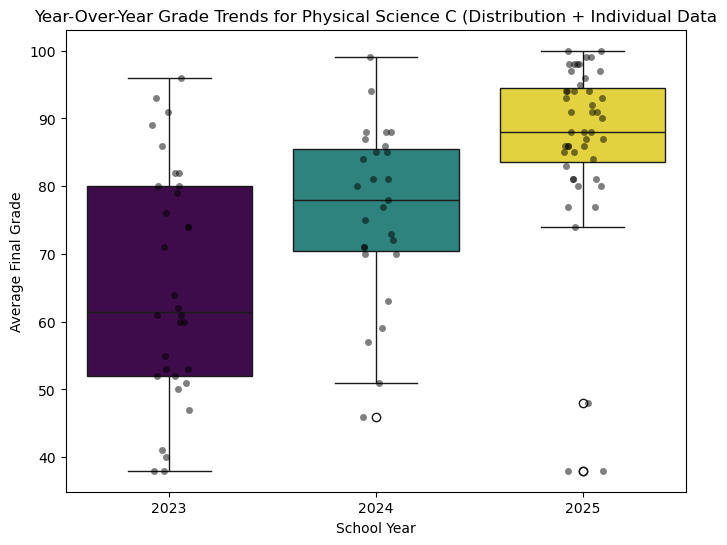

In [8]:
# visualize yearly averages (PSC)
plt.figure(figsize=(8,6))
sns.boxplot(data=psc_grades,
            x='school_year',
            y='final_grade',
            hue='school_year',
            palette ='viridis',
            legend=False)
sns.stripplot(data=psc_grades,
            x='school_year',
            y='final_grade',
            color='black',
            alpha=0.5,
            jitter=True)
plt.title('Year-Over-Year Grade Trends for Physical Science C (Distribution + Individual Data')
plt.xlabel('School Year')
plt.ylabel('Average Final Grade')
plt.savefig('outputs/Year-Over-Year Grade Trends for Physical Science C (Distribution + Individual Data')
plt.show()

In [9]:
# statistical analysis (group creation)
groups = []
unique_years = psc_grades['school_year'].unique()
for year in unique_years:
    data = psc_grades[psc_grades['school_year'] == year]['final_grade']
    groups.append(data)
print(f"Created {len(groups)} groups for testing.")

Created 3 groups for testing.


In [10]:
# statistical analysis (Shapiro-Wilkes test for normality)
for year, data_bucket in zip(unique_years, groups):
    stat, p_value = stats.shapiro(data_bucket)
    print(f"Year: {year}")
    print(f"p-Value: {p_value}")

    if p_value < 0.05:
        print("Result: NOT Normally Distributed (Use Kruskal-Wallis)")
    else:
        print("Result: Normally Distributed (Use ANOVA)")

Year: 2023
p-Value: 0.1665377661190542
Result: Normally Distributed (Use ANOVA)
Year: 2024
p-Value: 0.32575741551354065
Result: Normally Distributed (Use ANOVA)
Year: 2025
p-Value: 7.918657439677209e-08
Result: NOT Normally Distributed (Use Kruskal-Wallis)


In [11]:
# statistical analysis (Kruskal-Wallis test for significant difference)
stat, p_value = stats.kruskal(*groups)

print(f"H-Statistic: {stat}")
print(f"p-Value: {p_value}")

if p_value < 0.05:
    print("Result: Significant difference found! Proceed to post-hoc analysis.")
else:
    print("Result: No significant difference found.")

H-Statistic: 32.5869297471255
p-Value: 8.391471314742772e-08
Result: Significant difference found! Proceed to post-hoc analysis.


In [12]:
# statistical analysis (Dunn's Test to pinpoint different groups)
dunn_results = sp.posthoc_dunn(
    psc_grades,
    val_col='final_grade',
    group_col='school_year',
    p_adjust='bonferroni'
)
print(dunn_results)

              2023      2024          2025
2023  1.000000e+00  0.245844  8.776814e-08
2024  2.458444e-01  1.000000  2.166033e-03
2025  8.776814e-08  0.002166  1.000000e+00


## Research Question #2
Class Period Effects: Are there statistical differences in student grades based on the time of day the class meets?

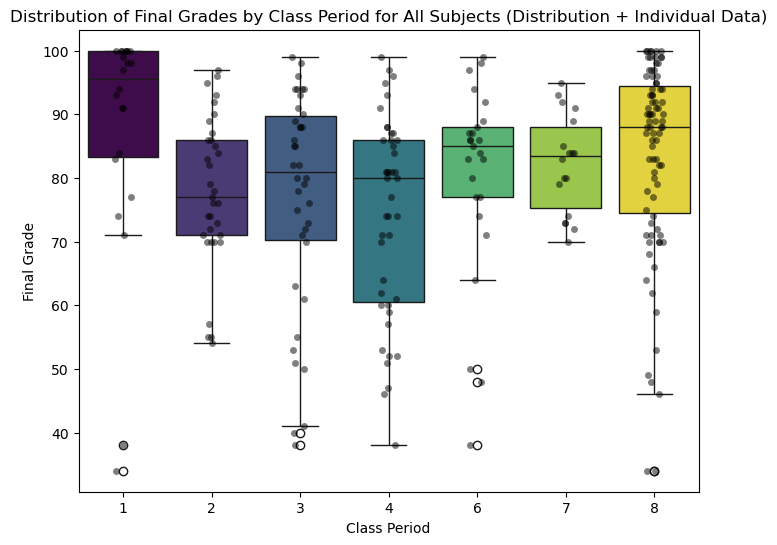

In [13]:
# visualize averages based on class size (all classes)
plt.figure(figsize=(8,6))
sns.boxplot(data=all_grades,
            x='class_period',
            y='final_grade',
            hue='class_period',
            legend=False,
            palette='viridis')
sns.stripplot(data=all_grades,
            x='class_period',
            y='final_grade',
            color='black',
            alpha=0.5,
            jitter=True)
plt.title('Distribution of Final Grades by Class Period for All Subjects (Distribution + Individual Data)')
plt.xlabel('Class Period')
plt.ylabel('Final Grade')
plt.savefig('outputs/Distribution of Final Grades by Class Period for All Subjects (Distribution + Individual Data)')
plt.show()

Note: Classes were not taught during Period 5 for these years.

In [14]:
# statistical analysis (group creation)
groups = []
unique_periods = all_grades['class_period'].unique()
for year in unique_periods:
    data = all_grades[all_grades['class_period'] == year]['final_grade']
    groups.append(data)
print(f"Created {len(groups)} groups for testing.")

Created 7 groups for testing.


In [15]:
# statistical analysis (Shapiro-Wilkes)
for year, data_bucket in zip(unique_periods, groups):
    stat, p_value = stats.shapiro(data_bucket)
    print(f"Period: {year}")
    print(f"p-Value: {p_value}")

    if p_value < 0.05:
        print("Result: NOT Normally Distributed (Use Kruskal-Wallis)")
    else:
        print("Result: Normally Distributed (Use ANOVA)")

Period: 2
p-Value: 0.133313051626406
Result: Normally Distributed (Use ANOVA)
Period: 3
p-Value: 0.002857816412183619
Result: NOT Normally Distributed (Use Kruskal-Wallis)
Period: 4
p-Value: 0.05586777430529097
Result: Normally Distributed (Use ANOVA)
Period: 6
p-Value: 0.002191917907828472
Result: NOT Normally Distributed (Use Kruskal-Wallis)
Period: 8
p-Value: 3.6827610967834055e-07
Result: NOT Normally Distributed (Use Kruskal-Wallis)
Period: 1
p-Value: 1.9046369851808376e-05
Result: NOT Normally Distributed (Use Kruskal-Wallis)
Period: 7
p-Value: 0.37520085499581834
Result: Normally Distributed (Use ANOVA)


In [16]:
# statistical analysis (Kruskal-Wallis)
stat, p_value = stats.kruskal(*groups)

print(f"H-Statistic: {stat}")
print(f"p-Value: {p_value}")

if p_value < 0.05:
    print("Result: Significant difference found! Proceed to post-hoc.")
else:
    print("Result: No significant difference found.")

H-Statistic: 27.395714887236746
p-Value: 0.00012206183559216315
Result: Significant difference found! Proceed to post-hoc.


In [17]:
# statistical analysis (Dunn's Test)
dunn_results = sp.posthoc_dunn(
    all_grades,
    val_col='final_grade',
    group_col='class_period',
    p_adjust='bonferroni'
)
print(dunn_results)

          1         2         3         4         6         7         8
1  1.000000  0.007246  0.026226  0.000575  0.332842  0.427137  1.000000
2  0.007246  1.000000  1.000000  1.000000  1.000000  1.000000  0.145059
3  0.026226  1.000000  1.000000  1.000000  1.000000  1.000000  0.549966
4  0.000575  1.000000  1.000000  1.000000  1.000000  1.000000  0.007583
6  0.332842  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000
7  0.427137  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000
8  1.000000  0.145059  0.549966  0.007583  1.000000  1.000000  1.000000


## Research Question #3
Class Size Effects: Is there a correlation between the number of students in a class and their academic performance?

In [18]:
# determine averages based on class size (all classes)
class_size_average = all_grades.groupby('number_in_class')['final_grade'].mean()
class_size_average

number_in_class
5     94.800000
6     76.666667
11    87.022727
13    78.735849
14    72.750000
18    73.750000
20    83.425000
24    80.166667
26    81.807692
Name: final_grade, dtype: float64

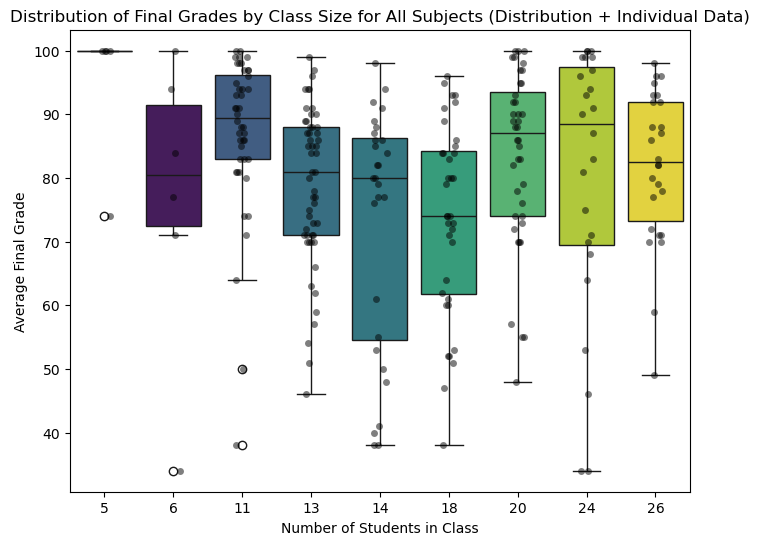

In [19]:
# visualize averages based on class period (all classes)
plt.figure(figsize=(8,6))
sns.boxplot(data=all_grades,
            x='number_in_class',
            y='final_grade',
            hue='number_in_class',
            legend=False,
            palette='viridis')
sns.stripplot(data=all_grades,
            x='number_in_class',
            y='final_grade',
            color='black',
            alpha=0.5,
            jitter=True)
plt.title('Distribution of Final Grades by Class Size for All Subjects (Distribution + Individual Data)')
plt.xlabel('Number of Students in Class')
plt.ylabel('Average Final Grade')
plt.savefig('outputs/Distribution of Final Grades by Class Size for All Subjects (Distribution + Individual Data)')
plt.show()

In [20]:
# statistical analysis (group creation)
groups = []
unique_sizes = all_grades['number_in_class'].unique()
for year in unique_sizes:
    data = all_grades[all_grades['number_in_class'] == year]['final_grade']
    groups.append(data)
print(f"Created {len(groups)} groups for testing.")

Created 9 groups for testing.


In [21]:
# statistical analysis (Shapiro-Wilkes)
for year, data_bucket in zip(unique_sizes, groups):
    stat, p_value = stats.shapiro(data_bucket)
    print(f"Class Size: {year}")
    print(f"p-Value: {p_value}")

    if p_value < 0.05:
        print("Result: NOT Normally Distributed (Use Kruskal-Wallis)")
    else:
        print("Result: Normally Distributed (Use ANOVA)")

Class Size: 13
p-Value: 0.04224343467569719
Result: NOT Normally Distributed (Use Kruskal-Wallis)
Class Size: 14
p-Value: 0.0014760864345107116
Result: NOT Normally Distributed (Use Kruskal-Wallis)
Class Size: 18
p-Value: 0.12678912480049154
Result: Normally Distributed (Use ANOVA)
Class Size: 11
p-Value: 4.711175235794083e-06
Result: NOT Normally Distributed (Use Kruskal-Wallis)
Class Size: 5
p-Value: 0.00013097817774592886
Result: NOT Normally Distributed (Use Kruskal-Wallis)
Class Size: 6
p-Value: 0.3231278668195775
Result: Normally Distributed (Use ANOVA)
Class Size: 20
p-Value: 0.005138755854706854
Result: NOT Normally Distributed (Use Kruskal-Wallis)
Class Size: 26
p-Value: 0.08715225674379704
Result: Normally Distributed (Use ANOVA)
Class Size: 24
p-Value: 0.0021532084687744747
Result: NOT Normally Distributed (Use Kruskal-Wallis)


In [22]:
# statistical analysis (Kruskal-Wallis)
stat, p_value = stats.kruskal(*groups)

print(f"H-Statistic: {stat}")
print(f"p-Value: {p_value}")

if p_value < 0.05:
    print("Result: Significant difference found! Proceed to post-hoc.")
else:
    print("Result: No significant difference found.")

H-Statistic: 33.57022595401664
p-Value: 4.859473369016934e-05
Result: Significant difference found! Proceed to post-hoc.


In [23]:
# statistical analysis (Dunn's Test)
dunn_results = sp.posthoc_dunn(
    psc_grades,
    val_col='final_grade',
    group_col='number_in_class',
    p_adjust='bonferroni'
)
print(dunn_results)

          11        13        14        18
11  1.000000  0.000571  0.000295  0.000002
13  0.000571  1.000000  1.000000  0.662487
14  0.000295  1.000000  1.000000  0.790135
18  0.000002  0.662487  0.790135  1.000000


## Findings

#### Question #1: Year-Over-Year Trends: Have final PSC grades changed significantly during my first three years of teaching?
Student performance imporovements were not statisically sigificant between the years 2023 and 2024. However, final grade improvements were significantly different between the years 2024 and 2025, suggesting an improvement due to  improved instructional methods.

#### Question #2: Class Period Effects: Are there statistical differences in student grades based on the time of day the class meets?
Student performance was statistically significant between certain class periods, suggesting a "morning slump" and a a similar "end of day slump" where lesson effectiveness drops.

#### Question #3: Class Size Effects: Is there a correlation between the number of students in a class and their academic performance?
Student performance was statistically signifcant between class sizes, suggesting smaller classes lead to increased one-on-one attention to individual students.